Robert Steward

CS7641

KNN Analysis

This notebook is broken into two halves both providing code for the K Nearest Neighbors Analysis. The first part is for the Titanic data set. The second part is for the Diabetes data set


In [ ]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #tester
from sklearn.metrics import confusion_matrix #tester
from sklearn.metrics import f1_score  #tester
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("dataSets/titanic.csv")
del df["PassengerId"]
del df["Name"]
del df["Ticket"]
del df["Cabin"]
df['Sex']=df['Sex'].replace(to_replace='male',value='1')
df['Sex']=df['Sex'].replace(to_replace='female',value='0')
df['Embarked']=df['Embarked'].replace(to_replace='S',value='0')
df['Embarked']=df['Embarked'].replace(to_replace='C',value='1')
df['Embarked']=df['Embarked'].replace(to_replace='Q',value='2')
df=df.dropna()
y=df['Survived']
X=df.drop(['Survived'],axis=1)

In [3]:
print(len(df))
print(df.head())

712
   Survived  Pclass Sex   Age  SibSp  Parch     Fare Embarked
0         0       3   1  22.0      1      0   7.2500        0
1         1       1   0  38.0      1      0  71.2833        1
2         1       3   0  26.0      0      0   7.9250        0
3         1       1   0  35.0      1      0  53.1000        0
4         0       3   1  35.0      0      0   8.0500        0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)  #same as DT
math.sqrt(len(y_test))


13.341664064126334

In [6]:
tic = time.perf_counter()
model= KNeighborsClassifier(metric='minkowski')
grid_values={"n_neighbors":[5,6,7,8,9,10,11,12,13,14,15,16,17,25,30,40],
            "p":[2,3,4]}
grid = GridSearchCV(model, grid_values, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)
toc = time.perf_counter()
print(f"Grid Search KNN titanic {toc - tic:0.4f} seconds")
print(grid_search.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Grid Search KNN titanic 6.4102 seconds
{'n_neighbors': 13, 'p': 3}


In [8]:
tic = time.perf_counter()
model=KNeighborsClassifier(n_neighbors=12,p=2,metric='minkowski')
model.fit(X_train,y_train)
toc = time.perf_counter()
print(f"Time for best fit KNN diabetes {toc - tic:0.4f} seconds")
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
cm=confusion_matrix(y_test,y_test)
print(cm)

print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
print(f1_score(y_test,y_pred_test))
print(f1_score(y_train,y_pred_train))

Time for best fit KNN diabetes 0.0074 seconds
[[104   0]
 [  0  74]]
0.7247191011235955
0.702247191011236
0.5954198473282442
0.6016260162601627


In [187]:
result=[]
neighbors=[5,12,15,20,25,30,35]
for i in range(7):
    nbrs=neighbors[i]
    classifier=KNeighborsClassifier(n_neighbors=nbrs,p=2,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred_train=classifier.predict(X_train)
    y_pred=classifier.predict(X_test)
    f1score_test=f1_score(y_test,y_pred)
    f1score_train=f1_score(y_train,y_pred_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred)
    temp=[nbrs,round(acc_train,3),round(acc_test,3),round(f1score_train,3),round(f1score_train,3)]
    result.append(temp)
    if nbrs==11:
        print(confusion_matrix(y_test,y_pred))
df_results=pd.DataFrame(result, columns=["Neighbors", "Accuracy Train", "Accuracy Test", "F1 Score Train", "F1 Score Test" ])
print(df_results)

   Neighbors  Accuracy Train  Accuracy Test  F1 Score Train  F1 Score Test
0          5           0.873          0.792           0.836          0.836
1         12           0.841          0.787           0.789          0.789
2         15           0.843          0.770           0.798          0.798
3         20           0.816          0.758           0.750          0.750
4         25           0.796          0.753           0.725          0.725
5         30           0.807          0.770           0.738          0.738
6         35           0.800          0.770           0.733          0.733


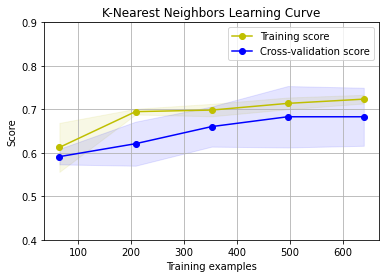

In [22]:
model=KNeighborsClassifier(n_neighbors=12,p=2,metric='minkowski')
title="K-Nearest Neighbors Learning Curve"
trainingSizes,trainingScores,testingScores = learning_curve(model,X,y,random_state = 42,cv = 10)
plt.figure()
plt.title(title)
ylim = (0.4, .9)
if ylim is not None:
    plt.ylim(*ylim)
        
plt.xlabel("Training examples")
plt.ylabel("Score")
    
trainingScores_std = np.std(trainingScores, axis=1)
trainingScores_mean = np.mean(trainingScores, axis=1)
testingScores_mean = np.mean(testingScores, axis=1)
testingScores_std = np.std(testingScores, axis=1)
plt.grid()

plt.fill_between(trainingSizes, trainingScores_mean - trainingScores_std,
                trainingScores_mean + trainingScores_std, alpha=0.1,
                color="y")
plt.fill_between(trainingSizes, testingScores_mean - testingScores_std,
                testingScores_mean + testingScores_std, alpha=0.1, color="b")
plt.plot(trainingSizes, trainingScores_mean, 'o-', color="y",
        label="Training score")
plt.plot(trainingSizes, testingScores_mean, 'o-', color="b",
        label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [114]:
#diabetes data set

In [9]:
df=pd.read_csv("dataSets/diabetes.csv")
zero_to_nan=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zero_to_nan:
             df[col]=df[col].replace(0,np.NaN)
             mean=int(df[col].mean(skipna=True))
             df[col]=df[col].replace(np.NaN,mean)
X=df.iloc[:,0:8]
y=df.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  #same as DT

In [10]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
math.sqrt(X_test.shape[0])

12.409673645990857

In [12]:
tic = time.perf_counter()
model= KNeighborsClassifier(metric='minkowski')
grid_values={"n_neighbors":[5,6,7,8,9,10,11,12,13,14, 15,16,17,25,30,40],
            "p":[2,3,4]}
grid = GridSearchCV(model, grid_values, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)
toc = time.perf_counter()
print(f"Grid Search KNN diabetes {toc - tic:0.4f} seconds")

print(grid_search.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Grid Search KNN diabetes 8.7386 seconds
{'n_neighbors': 15, 'p': 2}


In [14]:
tic = time.perf_counter()
model=KNeighborsClassifier(n_neighbors=15,p=2,metric='minkowski')
model.fit(X_train,y_train)
toc = time.perf_counter()
print(f"Time for best fit KNN diabetes {toc - tic:0.4f} seconds")
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)

Time for best fit KNN diabetes 0.0040 seconds


In [201]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test,y_pred))
print(f1_score(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred))

[[94 13]
 [18 29]]
0.651685393258427
0.6530612244897959
0.7785016286644951
0.7987012987012987


In [208]:
result=[]
neighbors=[5,10,15,20,25,30,35]
for i in range(len(neighbors)):
    nbrs=neighbors[i]
    classifier=KNeighborsClassifier(n_neighbors=nbrs,p=2,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred_train=classifier.predict(X_train)
    y_pred=classifier.predict(X_test)
    f1score_test=f1_score(y_test,y_pred)
    f1score_train=f1_score(y_train,y_pred_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred)
    temp=[nbrs,round(acc_train,3),round(acc_test,3),round(f1score_train,3),round(f1score_train,3)]
    result.append(temp)
    if nbrs==11:
        print(confusion_matrix(y_test,y_pred))
df_results=pd.DataFrame(result, columns=["Neighbors", "Accuracy Train", "Accuracy Test", "F1 Score Train", "F1 Score Test" ])
print(df_results)

   Neighbors  Accuracy Train  Accuracy Test  F1 Score Train  F1 Score Test
0          5           0.806          0.753           0.716          0.716
1         10           0.795          0.792           0.677          0.677
2         15           0.783          0.786           0.675          0.675
3         20           0.775          0.779           0.635          0.635
4         25           0.779          0.799           0.653          0.653
5         30           0.764          0.799           0.611          0.611
6         35           0.769          0.818           0.634          0.634


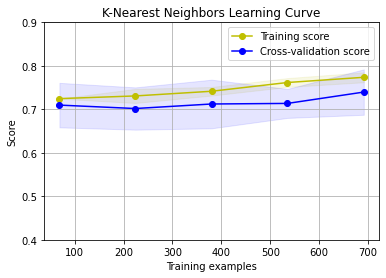

In [26]:
model=KNeighborsClassifier(n_neighbors=15,p=2,metric='minkowski')
title="K-Nearest Neighbors Learning Curve"
trainingSizes,trainingScores,testingScores = learning_curve(model,X,y,random_state = 42,cv = 10)
plt.figure()
plt.title(title)
ylim = (0.4, .9)
if ylim is not None:
    plt.ylim(*ylim)
        
plt.xlabel("Training examples")
plt.ylabel("Score")
    
trainingScores_std = np.std(trainingScores, axis=1)
trainingScores_mean = np.mean(trainingScores, axis=1)
testingScores_mean = np.mean(testingScores, axis=1)
testingScores_std = np.std(testingScores, axis=1)
plt.grid()

plt.fill_between(trainingSizes, trainingScores_mean - trainingScores_std,
                trainingScores_mean + trainingScores_std, alpha=0.1,
                color="y")
plt.fill_between(trainingSizes, testingScores_mean - testingScores_std,
                testingScores_mean + testingScores_std, alpha=0.1, color="b")
plt.plot(trainingSizes, trainingScores_mean, 'o-', color="y",
        label="Training score")
plt.plot(trainingSizes, testingScores_mean, 'o-', color="b",
        label="Cross-validation score")

plt.legend(loc="best")
plt.show()